<a href="https://colab.research.google.com/github/Awangnugrawan/Fruit-Classification-implement-TF-lite/blob/main/Fruit_Classification_implement_TF_lite.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SUBMISSION PROJECT DICODING "Belajar Pengemabangan Machine Learning"
## DATA DIRI

*  Nama= Awang Mulya Nugrawan
*  username DICODING= awang_nugrawan
*  email = awangmulyanugrawan@gmail.com
*  No.hp = 082191862002
*  Asal= Makassar, Sulawesi Selatan
*  Status = Mahasiswa Sisfor Universitas Hasanuddin











#LIBRARY

In [ ]:
import tensorflow as tf
import zipfile,os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt
import numpy as np
from google.colab import files
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pathlib

#Import Dataset dengan API KAGGLE

In [ ]:
! chmod 600 /content/kaggle.json

In [ ]:
! KAGGLE_CONFIG_DIR=/content/  kaggle datasets download -d sshikamaru/fruit-recognition

 99% 101M/102M [00:04<00:00, 21.4MB/s] 
100% 102M/102M [00:04<00:00, 21.6MB/s]


In [ ]:
zip_file = zipfile.ZipFile('/content/fruit-recognition.zip')
zip_file.extractall('/tmp/')

dir_path = '/tmp/data/train'

os.listdir(dir_path)



['Banana',
 'Passion Fruit',
 'Lemon',
 'Grape Blue',
 'Onion White',
 'Plum',
 'Apple Braeburn',
 'Pepper Green',
 'Limes',
 'Avocado',
 'Papaya',
 'Cactus fruit',
 'Orange',
 'Potato Red',
 'Blueberry',
 'Cantaloupe',
 'Strawberry',
 'Apricot',
 'Pepper Red',
 'Cucumber Ripe',
 'Mango',
 'Watermelon',
 'Kiwi',
 'Clementine',
 'Cherry',
 'Apple Granny Smith',
 'Pomegranate',
 'Raspberry',
 'Pear',
 'Tomato',
 'Corn',
 'Pineapple',
 'Peach']

#Pre-processing data dengan image augmentation.

In [ ]:
train_datagen = ImageDataGenerator(
                    rescale=1.0/255,
                    rotation_range=30,
                    width_shift_range=0.2,
                    height_shift_range=0.2,
                    shear_range=0.2,
                    zoom_range=0.2,
                    vertical_flip=True,
                    fill_mode='nearest',   
                    validation_split = 0.2)

validation_datagen = ImageDataGenerator(
    rescale=1.0/255
)


#Mempersiapkan data latih yang akan dipelajari oleh model.

In [ ]:
train_generator = train_datagen.flow_from_directory(
        dir_path,  # direktori data latih
        class_mode='categorical',
        target_size=(100, 100), 
        shuffle =True,
        subset= 'training'
        )

validation_generator = train_datagen.flow_from_directory(
        dir_path, # direktori data validasi
        target_size=(100, 100), 
        class_mode='categorical',
        subset= 'validation'
        )  

Found 13493 images belonging to 33 classes.
Found 3361 images belonging to 33 classes.


#Membangun arsitektur model dengan Convolutional Neural Network (CNN).

In [ ]:
model = Sequential([
    Conv2D(16, (3,3), activation='relu', input_shape=(100, 100, 3)),
    MaxPooling2D(2, 2),
    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(33, activation='softmax') 
])



#Compile dan latih model dengan model.compile dan model.fit hingga mendapatkan akurasi yang diinginkan.

In [ ]:
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])

#Callback

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.92):
      print("\nAkurasi telah mencapai >92%!")
      self.model.stop_training = True
callbacks = myCallback()

In [ ]:
hist = model.fit(
      train_generator,
      steps_per_epoch=32,  # berapa batch yang akan dieksekusi pada setiap epoch
      epochs=20,
      validation_data=validation_generator, # menampilkan akurasi pengujian data validasi
      validation_steps=8,  # berapa batch yang akan dieksekusi pada setiap epoch
      verbose=2,
      batch_size=64,
      callbacks=[callbacks])

Epoch 1/20
32/32 - 15s - loss: 3.3598 - accuracy: 0.0811 - val_loss: 2.6104 - val_accuracy: 0.2891 - 15s/epoch - 480ms/step
Epoch 2/20
32/32 - 14s - loss: 2.1307 - accuracy: 0.2891 - val_loss: 1.8820 - val_accuracy: 0.4062 - 14s/epoch - 445ms/step
Epoch 3/20
32/32 - 15s - loss: 1.5389 - accuracy: 0.4590 - val_loss: 1.2555 - val_accuracy: 0.5000 - 15s/epoch - 455ms/step
Epoch 4/20
32/32 - 15s - loss: 1.1785 - accuracy: 0.5801 - val_loss: 0.9988 - val_accuracy: 0.6445 - 15s/epoch - 467ms/step
Epoch 5/20
32/32 - 15s - loss: 0.9321 - accuracy: 0.6514 - val_loss: 0.7367 - val_accuracy: 0.6992 - 15s/epoch - 456ms/step
Epoch 6/20
32/32 - 15s - loss: 0.8223 - accuracy: 0.7002 - val_loss: 0.7424 - val_accuracy: 0.7344 - 15s/epoch - 462ms/step
Epoch 7/20
32/32 - 14s - loss: 0.6801 - accuracy: 0.7500 - val_loss: 0.5985 - val_accuracy: 0.8008 - 14s/epoch - 453ms/step
Epoch 8/20
32/32 - 15s - loss: 0.6044 - accuracy: 0.7920 - val_loss: 0.5188 - val_accuracy: 0.8242 - 15s/epoch - 465ms/step
Epoch 9/

#Plot Akurasi dan Loss

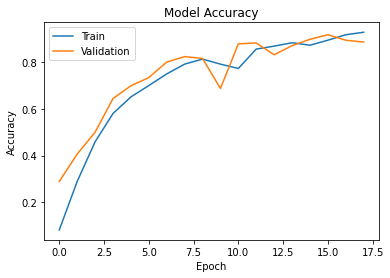

In [ ]:
# Menampilkan plot akurasi pelatihan
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

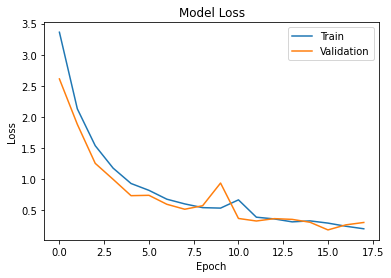

In [ ]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

#Menyimpan model ke dalam format TF-Lite.

In [ ]:
# Menyimpan model dalam format SavedModel
export_dir = 'saved_model/'
tf.saved_model.save(model, export_dir)
 
# Convert SavedModel menjadi vegs.tflite
converter = tf.lite.TFLiteConverter.from_saved_model(export_dir)
tflite_model = converter.convert()
 
tflite_model_file = pathlib.Path('vegs.tflite')
tflite_model_file.write_bytes(tflite_model)

4658644